In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#1.0 OBTAIN INITIAL FILES
    #1.01 Carpetas de Investigación
        #1.01.01 Download file from the following url
        #https://datos.cdmx.gob.mx/explore/dataset/carpetas-de-investigacion-pgj-cdmx/download/?format=csv&timezone=America/Mexico_City&use_labels_for_header=true
    
        #1.01.02 Save as "Carpetas de Investigación PGJ CDMX.csv" in current folder
    
    #1.02 Alcaldías in CDMX
    
 

In [4]:
#2. UPLOAD IN PYTHON FILES

#2.01 Carpetas de Investigación (PGJ Files)
PGJ_input=pd.read_csv("Carpetas de Investigación PGJ CDMX.csv",sep=";")
#PGJ_input.head()

#2.02 Alcaldías (Town Halls)
Alcaldias_input=pd.read_csv("Alcaldías.csv",sep=";")
#Alcaldias_input

#2.03 Budget information
#2.04 Demographic information
Sociodemo = pd.read_csv("sociodemo_df.csv")
#2.05 Crime Clasification
PGJ_Class=pd.read_csv("Clasificación Delitos.csv")
PGJ_Class

,delito,Violencia,Tipo Daño
0,ABUSO DE AUTORIDAD,No Violento,Personal
1,ABUSO DE CONFIANZA,No Violento,Personal
2,ABUSO SEXUAL,Violento,Personal
3,AMENAZAS,Violento,Personal
4,DAÑO EN PROPIEDAD AJENA CULPOSA,No Violento,Material
5,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,No Violento,Material
6,DAÑO EN PROPIEDAD AJENA INTENCIONAL,No Violento,Material
7,DENUNCIA DE HECHOS,No Violento,Otro
8,DESPOJO,No Violento,Material
9,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,No Violento,Material


In [5]:
# 3.0 Adjust the Town Halls names (upper cases, no accents)

#3.01 From Alcaldias file.
    #3.01.02 Define variable alcaldias in order to have a list of all the "Alcaldias" in CDMX
alcaldias=Alcaldias_input["NOMBRE"]
alcaldias=alcaldias.str.replace("Á","A")
alcaldias=alcaldias.str.replace("á","a")
alcaldias=alcaldias.str.replace("É","E")
alcaldias=alcaldias.str.replace("é","e")
alcaldias=alcaldias.str.replace("Í","I")
alcaldias=alcaldias.str.replace("í","i")
alcaldias=alcaldias.str.replace("Ó","O")
alcaldias=alcaldias.str.replace("ó","o")
alcaldias=alcaldias.str.replace("Ú","u")
alcaldias=alcaldias.str.replace("ú","u")
alcaldias=alcaldias.str.replace(".","")
alcaldias = [alcaldia.upper() for alcaldia in alcaldias]
alcaldias

#3.02 From Budget File

#3.03 From Dempographics file

['TLALPAN',
 'TLAHUAC',
 'VENUSTIANO CARRANZA',
 'CUAUHTEMOC',
 'IZTAPALAPA',
 'AZCAPOTZALCO',
 'BENITO JUAREZ',
 'CUAJIMALPA DE MORELOS',
 'IZTACALCO',
 'GUSTAVO A MADERO',
 'MIGUEL HIDALGO',
 'LA MAGDALENA CONTRERAS',
 'COYOACAN',
 'MILPA ALTA',
 'ALVARO OBREGON',
 'XOCHIMILCO']

In [24]:
#4.0 Filter only the data needed

#4.01 Alcaldias in CMX
    #4.01.01 From the PGJ files
PGJ_alcaldias=PGJ_input.loc[PGJ_input["alcaldia_hechos"].isin(alcaldias),:]
#PGJ_alcaldias

    #4.01.02 From the Budget file

    #4.01.03 from the Demographics file
Sociodemo=Sociodemo.rename(columns={"Municipio":"alcaldia_hechos"})

In [25]:
# 4.02 Years that will be included in the analysis of crime rates, for the rest of the information
Primer_año=2016
Ultimo_año=2019

# 4.02.01 The historic data will only be considered in the PGJ files to review historic changes in the crime rates
PGJ_Hist=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]>Primer_año-1,:]
PGJ_Hist=PGJ_Hist.loc[PGJ_Hist["año_hechos"]<Ultimo_año+1,:]
#PGJ_Hist.head()

#4.02.02 The budget used will be last year's Budget in order to have full year of Crime Vs Full budget usage
#4.02.03 The Demographic information will be from the last census registered


In [26]:
#5.0 Define the Crimes that will be tracked to narrow the scope

#5.01 For these exercise, we will only review the Top 30 crimes from 2018
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_Top30_2018=PGJ_2018.groupby(["delito"],as_index=False).count()
PGJ_Top30_2018=(PGJ_Top30_2018.sort_values(by ="año_hechos",ascending=False)).head(30)
PGJ_Top30_2018=PGJ_Top30_2018["delito"]
PGJ_Top30_2018=PGJ_Top30_2018.tolist()
#PGJ_Top30_2018

In [27]:
#6.0 Filter only the crimes included in the Top 30 from 2018
PGJ_Top_Hist=PGJ_Hist.loc[PGJ_Hist["delito"].isin(PGJ_Top30_2018),:]
#PGJ_201X Separate by Year 
PGJ_2016=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2016,:]
PGJ_2017=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2017,:]
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_2019=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2019,:]

#PGJ_Top_Hist["delito"].unique() #--> Should give the Top 30 crimes in 2018
#PGJ_Top_Hist["año_hechos"].unique() #--> Should give the years from Primer_año to Ultimo_año

PGJ_Top_Delitos_2016=PGJ_2016.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2017=PGJ_2017.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2018=PGJ_2018.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2019=PGJ_2019.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]


In [28]:
Delitos_Alcaldia_2016 = PGJ_Top_Delitos_2016.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2016
Delitos_Alcaldia_2016_Resume = Delitos_Alcaldia_2016['delito'].reset_index()
Delitos_Alcaldia_2016_Resume = Delitos_Alcaldia_2016_Resume.rename(columns = {"delito":"Delitos_2016"})
Delitos_Alcaldia_2016_Resume_df = pd.DataFrame(Delitos_Alcaldia_2016_Resume)
#Delitos_Alcaldia_2016_Resume_df
Total_Delitos_2016 = Delitos_Alcaldia_2016["delito"].sum()
Total_Delitos_2016

149532

In [29]:
Delitos_Alcaldia_2017 = PGJ_Top_Delitos_2017.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2017
Delitos_Alcaldia_2017_Resume = Delitos_Alcaldia_2017['delito'].reset_index()
Delitos_Alcaldia_2017_Resume = Delitos_Alcaldia_2017_Resume.rename(columns = {"delito":"Delitos_2017"})
Delitos_Alcaldia_2017_Resume_df = pd.DataFrame(Delitos_Alcaldia_2017_Resume)
#Delitos_Alcaldia_2017_Resume_df
Total_Delitos_2017 = Delitos_Alcaldia_2017["delito"].sum()
Total_Delitos_2017

178743

In [30]:
Delitos_Alcaldia_2018 = PGJ_Top_Delitos_2018.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2018
Delitos_Alcaldia_2018_Resume = Delitos_Alcaldia_2018['delito'].reset_index()
Delitos_Alcaldia_2018_Resume = Delitos_Alcaldia_2018_Resume.rename(columns = {"delito":"Delitos_2018"})
Delitos_Alcaldia_2018_Resume_df = pd.DataFrame(Delitos_Alcaldia_2018_Resume)
#Delitos_Alcaldia_2018_Resume_df
Total_Delitos_2018 = Delitos_Alcaldia_2018["delito"].sum()
Total_Delitos_2018

198627

In [31]:
Delitos_Alcaldia_2019 = PGJ_Top_Delitos_2019.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2019
Delitos_Alcaldia_2019_Resume = Delitos_Alcaldia_2019['delito'].reset_index()
Delitos_Alcaldia_2019_Resume = Delitos_Alcaldia_2019_Resume.rename(columns = {"delito":"Delitos_2019"})
Delitos_Alcaldia_2019_Resume_df = pd.DataFrame(Delitos_Alcaldia_2019_Resume)
#Delitos_Alcaldia_2019_Resume_df
Total_Delitos_2019 = Delitos_Alcaldia_2019["delito"].sum()
Total_Delitos_2019

69182

In [32]:
#7.0 HISTORIC INFORMATION FROM CRIMES
#7.01 Create table with total crimes for CDMX (for the Top 30 2018 Crimes)
años_total = {"Total delitos" : {'2016':Total_Delitos_2016, '2017':Total_Delitos_2017,
           '2018':Total_Delitos_2018, '2019':Total_Delitos_2019}}
años_total_df = pd.DataFrame(años_total)
años_total_df

,Total delitos
2016,149532
2017,178743
2018,198627
2019,69182


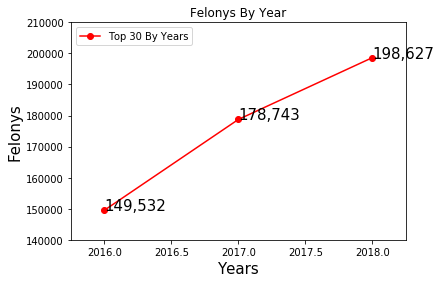

In [33]:
#7.01.01 Create Graph for Total Crimes for CDMX
x_axis = np.arange(2016,2019,1)
points = [149532, 178743, 198627]
Delitos_año = plt.plot(x_axis,points, color = "red", marker ="o", label = "Top 30 By Years")

plt.legend(loc="upper left", fontsize=10)
plt.ylabel('Felonys', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
plt.title("Felonys By Year")
plt.annotate('149,532', xy=(2016, 149532), fontsize= 15)             
plt.annotate('178,743', xy=(2017, 178743), fontsize= 15) 
plt.annotate('198,627', xy=(2018, 198627), fontsize= 15)
plt.ylim(140000,210000)
plt.xlim(2015.75,2018.25)

plt.savefig('años_total_df.png', bbox_inches='tight')

plt.show()
     

In [34]:
#7.02.01 Create table with historic evolution of each of the Top 30 2018 Crimes
Merge_Table1 = pd.merge(Delitos_Alcaldia_2016_Resume_df, Delitos_Alcaldia_2017_Resume_df, 
                        on ="alcaldia_hechos")
#Merge_Table1.head()
Merge_Table2 = pd.merge(Merge_Table1, Delitos_Alcaldia_2018_Resume_df, 
                        on ="alcaldia_hechos")
#merge_table2.head()
Merge_Alcaldias= pd.merge(Merge_Table2, Delitos_Alcaldia_2019_Resume_df, on = "alcaldia_hechos")
Merge_Alcaldias


,alcaldia_hechos,Delitos_2016,Delitos_2017,Delitos_2018,Delitos_2019
0,ALVARO OBREGON,9964,11668,13757,5362
1,AZCAPOTZALCO,7918,9274,9974,3311
2,BENITO JUAREZ,13699,17023,18853,6186
3,COYOACAN,11164,12704,14076,4659
4,CUAJIMALPA DE MORELOS,2141,2345,2690,1077
5,CUAUHTEMOC,23669,27887,30784,9975
6,GUSTAVO A MADERO,14063,17868,19675,7045
7,IZTACALCO,6371,7812,8820,3081
8,IZTAPALAPA,22160,26073,28709,10323
9,LA MAGDALENA CONTRERAS,2431,2632,2890,1268


In [35]:
#Export CSV for information available to teamates 
export_csv = Merge_Alcaldias.to_csv ("Delitos Por Año.csv")

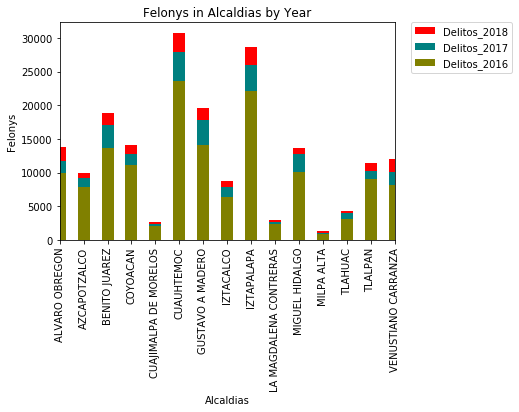

In [36]:
#7.02.02 Create Graph for the historic evolution of each of the Top 30 2018 Crimes
ax = plt.gca()

Merge_Table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2018', color='red', ax=ax)
Merge_Table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2017', color='teal', ax=ax)
Merge_Table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2016',color='olive', ax=ax)



plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(x='alcaldia_hechos', rotation='vertical')
plt.title("Felonys in Alcaldias by Year")
plt.xlim(0,14)
plt.xlabel("Alcaldias")
plt.ylabel("Felonys")
plt.savefig('Merge_Table2.png', bbox_inches='tight')


plt.show()

In [62]:
#8.0 2018 INFORMATION BY ALCALDIA

#8.01 Create Table with total crimes for Top 30 2018 Crimes for each Alcaldia
PGJ_Top_2018=PGJ_Top_Hist.loc[PGJ_Top_Hist["año_hechos"]==2018,:]
PGJ_Top_2018=PGJ_Top_2018.merge(PGJ_Class,on=["delito"])
Total_Delitos_Alcaldias_2018=PGJ_Top_2018.groupby("alcaldia_hechos",as_index=False).count()
Total_Delitos_Alcaldias_2018=Total_Delitos_Alcaldias_2018.merge(Sociodemo,on="alcaldia_hechos")
#Total_Delitos_Alcaldias_2018=Total_Delitos_Alcaldias_2018.loc[:,["delito"]]
#Total_Delitos_Alcaldias_2018

#8.02 Create Pie for total crimes for Top 30 2018 Crimes by Alcaldia

#explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#pie_Alcaldias = plt.pie(Total_Delitos_Alcaldias_2018["delito"],
                #labels=Total_Delitos_Alcaldias_2018["alcaldia_hechos"],
                #explode=explode,autopct="%1.1f%%",
                #radius=1)
#PGJ_Top_2018
Total_Delitos_Alcaldias_2018

,alcaldia_hechos,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,...,Unnamed: 0,POBLACIÓN TOTAL,GRADO PROMEDIO DE ESCOLARIDAD,POBLACIÓN ECONÓMICAMENTE ACTIVA,POBLACIÓN DESOCUPADA ABIERTA,POBLACIÓN SIN RELIGIÓN,Pobreza extrema,Pobreza moderada,Vulnerables por ingreso,Población con ingreso inferior a la línea de bienestar
0,ALVARO OBREGON,13757,13757,13757,13757,13757,13757,13757,13757,13522,...,8,"727,034",10,"342,414","15,184","32,541","8,023","200,666","63,389","272,078"
1,AZCAPOTZALCO,9974,9974,9974,9974,9974,9974,9974,9974,9886,...,0,"414,711",11,"187,402","10,113","18,890","2,132","75,727","43,880","121,740"
2,BENITO JUAREZ,18853,18853,18853,18853,18853,18853,18853,18853,18701,...,12,"385,439",14,"199,003","7,881","39,075",475,"15,949","7,455","23,879"
3,COYOACAN,14076,14076,14076,14076,14076,14076,14076,14076,13764,...,1,"620,416",12,"286,899","14,964","46,079","3,345","109,992","43,923","157,259"
4,CUAJIMALPA DE MORELOS,2690,2690,2690,2690,2690,2690,2690,2690,2654,...,2,"186,391",10,"84,664","3,170","5,665","2,194","53,801","11,910","67,905"
5,CUAUHTEMOC,30784,30784,30784,30784,30784,30784,30784,30784,30169,...,13,"531,831",11,"270,867","11,639","45,187","3,155","71,530","24,852","99,537"
6,GUSTAVO A MADERO,19675,19675,19675,19675,19675,19675,19675,19675,19097,...,3,"1,185,772",10,"526,179","28,579","53,723","13,950","331,016","139,609","484,576"
7,IZTACALCO,8820,8820,8820,8820,8820,8820,8820,8820,8750,...,4,"384,326",11,"175,316","8,702","18,949","1,441","59,681","20,915","82,037"
8,IZTAPALAPA,28709,28709,28709,28709,28709,28709,28709,28709,27966,...,5,"1,815,786",10,"792,297","40,029","88,101","32,741","632,668","166,466","831,874"
9,LA MAGDALENA CONTRERAS,2890,2890,2890,2890,2890,2890,2890,2890,2857,...,6,"239,086",10,"108,000","5,015","11,548","3,490","82,225","28,777","114,492"


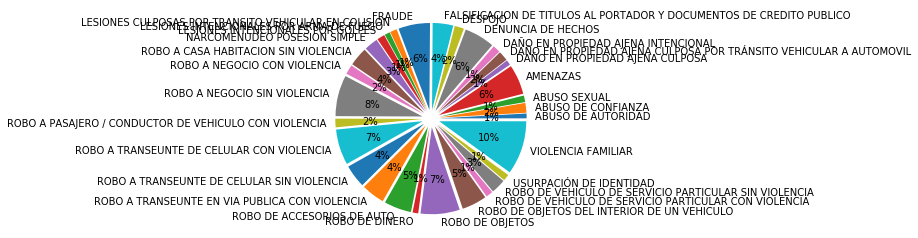

In [38]:
#9.0 2018 INFORMATION BY CRIME

#8.01 Create Table with total crimes for Top 30 2018 Crimes for each Alcaldia
Total_Delitos_2018=PGJ_Top_2018.groupby("delito",as_index=False).count()

#Total_Delitos_2018["delito"].unique()
#export_csv=Total_Delitos_2018.to_csv("Total_Delitos_2018.csv")

#8.02 Create Pie for total crimes for Top 30 2018 Crimes by Alcaldia

explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
         0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
         0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
pie_Delitos = plt.pie(Total_Delitos_2018["alcaldia_hechos"],
                labels=Total_Delitos_2018["delito"],
                explode=explode,
                autopct="%1.f%%",
                radius=1)

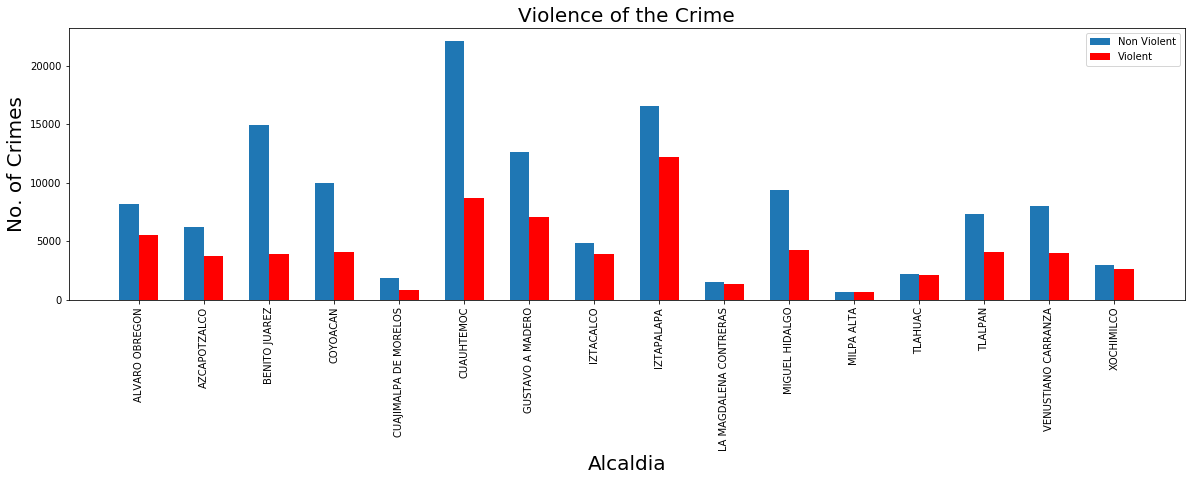

In [63]:
Total_Violencia_2018=PGJ_Top_2018.groupby(["alcaldia_hechos","Violencia"],as_index=False).count()
Total_Daños_2018=PGJ_Top_2018.groupby(["alcaldia_hechos","Tipo Daño"],as_index=False).count()
ConViolencia_2018=Total_Violencia_2018.loc[Total_Violencia_2018["Violencia"]=="Violento",:]
SinViolencia_2018=Total_Violencia_2018.loc[Total_Violencia_2018["Violencia"]=="No Violento",:]

fig, ax = plt.subplots(figsize=(20,5))

x_axis=np.arange(0,16)

r1 = np.arange(0,16)
r2 = [x + .3 for x in r1]


SVplot=ax.bar(r1,SinViolencia_2018["delito"],width=.3)
Vplot = ax.bar(r2,ConViolencia_2018["delito"],width=.3,color="red")

plt.xlabel("Alcaldia",fontsize=20)
plt.ylabel("No. of Crimes",fontsize=20)

tick_locations=[value+.15 for value in x_axis]
plt.xticks(tick_locations,ConViolencia_2018["alcaldia_hechos"],rotation="vertical",fontsize=10)
plt.legend((SVplot[0],Vplot[0]),("Non Violent","Violent"),fontsize=10)
plt.title("Violence of the Crime",fontsize=20)

plt.savefig("Violence of the Crime.png",bbox_inches="tight")

plt.show()

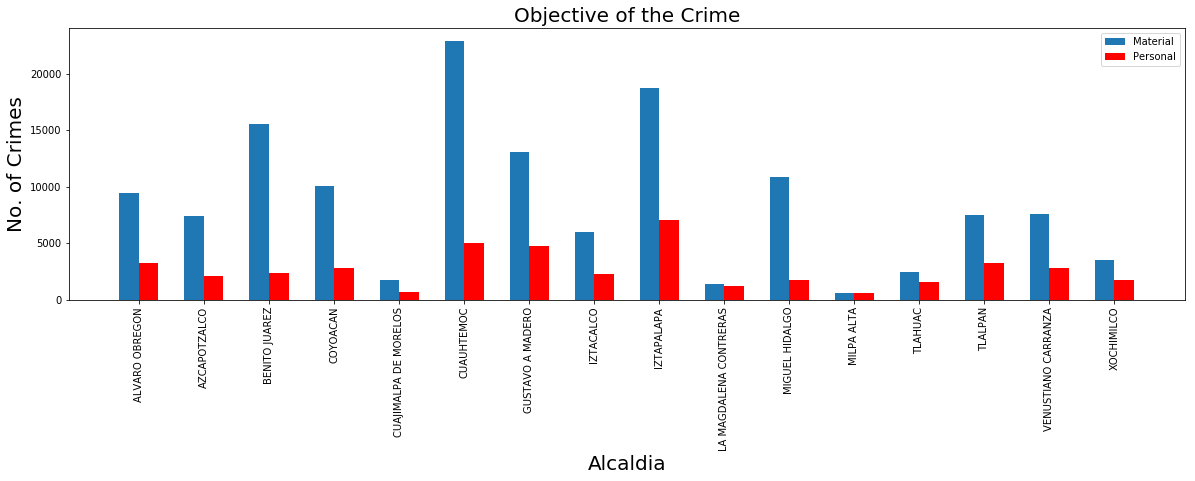

In [64]:
TipoDaño_2018=PGJ_Top_2018.groupby(["alcaldia_hechos","Tipo Daño"],as_index=False).count()
Material_2018=TipoDaño_2018.loc[TipoDaño_2018["Tipo Daño"]=="Material",:]
Personal_2018=TipoDaño_2018.loc[TipoDaño_2018["Tipo Daño"]=="Personal",:]

fig, ax = plt.subplots(figsize=(20,5))

x_axis=np.arange(0,16)

r1 = np.arange(0,16)
r2 = [x + .3 for x in r1]


Matplot=ax.bar(r1,Material_2018["delito"],width=.3)
Perplot = ax.bar(r2,Personal_2018["delito"],width=.3,color="red")

plt.xlabel("Alcaldia",fontsize=20)
plt.ylabel("No. of Crimes",fontsize=20)

tick_locations=[value + .15 for value in x_axis]
plt.xticks(tick_locations,Personal_2018["alcaldia_hechos"],rotation="vertical",fontsize=10)
plt.legend((Matplot[0],Perplot[0]),("Material","Personal"),fontsize=10)
plt.title("Objective of the Crime",fontsize=20)

plt.savefig("Objective of the Crime.png",bbox_inches="tight")

plt.show()

In [65]:
Delitos_Vs_Demo=Total_Delitos_Alcaldias_2018.loc[:,["alcaldia_hechos","delito",
                                                "POBLACIÓN TOTAL","GRADO PROMEDIO DE ESCOLARIDAD",
                                                "POBLACIÓN DESOCUPADA ABIERTA","POBLACIÓN SIN RELIGIÓN",
                                               "Pobreza extrema","Pobreza moderada","Vulnerables por ingreso",
                                               " Población con ingreso inferior a la línea de bienestar"]]

Delitos_Vs_Demo["POBLACIÓN TOTAL"]=Delitos_Vs_Demo["POBLACIÓN TOTAL"].str.replace(",","").astype(int)
Delitos_Vs_Demo["POBLACIÓN DESOCUPADA ABIERTA"]=Delitos_Vs_Demo["POBLACIÓN DESOCUPADA ABIERTA"].str.replace(",","").astype(int)
Delitos_Vs_Demo["POBLACIÓN SIN RELIGIÓN"]=Delitos_Vs_Demo["POBLACIÓN SIN RELIGIÓN"].str.replace(",","").astype(int)
Delitos_Vs_Demo["Pobreza extrema"]=Delitos_Vs_Demo["Pobreza extrema"].str.replace(",","").astype(int)
Delitos_Vs_Demo["Pobreza moderada"]=Delitos_Vs_Demo["Pobreza moderada"].str.replace(",","").astype(int)
Delitos_Vs_Demo["Vulnerables por ingreso"]=Delitos_Vs_Demo["Vulnerables por ingreso"].str.replace(",","").astype(int)
Delitos_Vs_Demo[" Población con ingreso inferior a la línea de bienestar"]=Delitos_Vs_Demo[" Población con ingreso inferior a la línea de bienestar"].str.replace(",","").astype(int)

Delitos_Vs_Demo["Crimes/10K citizen"]=Delitos_Vs_Demo["delito"]/Delitos_Vs_Demo["POBLACIÓN TOTAL"]*10000
Delitos_Vs_Demo["% Unemployment"]=Delitos_Vs_Demo["POBLACIÓN DESOCUPADA ABIERTA"]/Delitos_Vs_Demo["POBLACIÓN TOTAL"]
Delitos_Vs_Demo["% No Religion"]=Delitos_Vs_Demo["POBLACIÓN SIN RELIGIÓN"]/Delitos_Vs_Demo["POBLACIÓN TOTAL"]

export_csv=Delitos_Vs_Demo.to_csv("Delitos Vs Demograficos.csv")

Delitos_Vs_Demo

,alcaldia_hechos,delito,POBLACIÓN TOTAL,GRADO PROMEDIO DE ESCOLARIDAD,POBLACIÓN DESOCUPADA ABIERTA,POBLACIÓN SIN RELIGIÓN,Pobreza extrema,Pobreza moderada,Vulnerables por ingreso,Población con ingreso inferior a la línea de bienestar,Crimes/10K citizen,% Unemployment,% No Religion
0,ALVARO OBREGON,13757,727034,10,15184,32541,8023,200666,63389,272078,189.220862,0.020885,0.044759
1,AZCAPOTZALCO,9974,414711,11,10113,18890,2132,75727,43880,121740,240.504833,0.024386,0.045550
2,BENITO JUAREZ,18853,385439,14,7881,39075,475,15949,7455,23879,489.130576,0.020447,0.101378
3,COYOACAN,14076,620416,12,14964,46079,3345,109992,43923,157259,226.880029,0.024119,0.074271
4,CUAJIMALPA DE MORELOS,2690,186391,10,3170,5665,2194,53801,11910,67905,144.320273,0.017007,0.030393
5,CUAUHTEMOC,30784,531831,11,11639,45187,3155,71530,24852,99537,578.830493,0.021885,0.084965
6,GUSTAVO A MADERO,19675,1185772,10,28579,53723,13950,331016,139609,484576,165.925659,0.024102,0.045306
7,IZTACALCO,8820,384326,11,8702,18949,1441,59681,20915,82037,229.492670,0.022642,0.049304
8,IZTAPALAPA,28709,1815786,10,40029,88101,32741,632668,166466,831874,158.107839,0.022045,0.048519
9,LA MAGDALENA CONTRERAS,2890,239086,10,5015,11548,3490,82225,28777,114492,120.877007,0.020976,0.048301


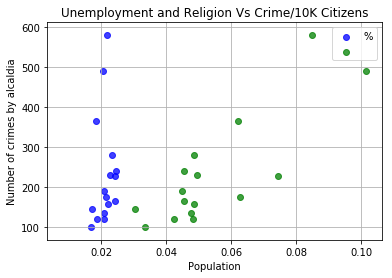

In [66]:
# loop to plot the x and y scatter for each of the following rubros
i=0
demos=["% Unemployment", "% No Religion"]
colores=["blue", "green"]

for demos in demos:
       
    plt.scatter(Delitos_Vs_Demo[demos], Delitos_Vs_Demo["Crimes/10K citizen"], marker="o", facecolors=colores[i], alpha=0.75)
    i=i+1

# Incorporate the other graph properties

plt.grid()
plt.title("Unemployment and Religion Vs Crime/10K Citizens")
plt.xlabel("Population")
plt.ylabel("Number of crimes by alcaldia")

# Create a legend
#plt.legend(handles=[ Urban, Suburban, Rural], loc= "upper rigth")
plt.legend(demos, loc="best")


# Save Figure
plt.savefig("Unemployment and Religion Vs Crime.png")

# Prints the scatter plot to the screen
plt.show()

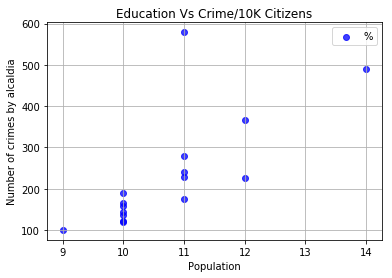

In [67]:
plt.scatter(Delitos_Vs_Demo["GRADO PROMEDIO DE ESCOLARIDAD"], Delitos_Vs_Demo["Crimes/10K citizen"], marker="o", facecolors="blue", alpha=0.75)


# Incorporate the other graph properties

plt.grid()
plt.title("Education Vs Crime/10K Citizens")
plt.xlabel("Population")
plt.ylabel("Number of crimes by alcaldia")

# Create a legend
#plt.legend(handles=[ Urban, Suburban, Rural], loc= "upper rigth")
plt.legend(demos, loc="best")


# Save Figure
plt.savefig("Education Vs Crime Vs 10K Citizens.png")

# Prints the scatter plot to the screen
plt.show()

In [71]:
Total_Daño_2018=Total_Daños_2018.loc[:,["alcaldia_hechos","Tipo Daño","delito"]]

Daño_Vs_Demo=Total_Daño_2018.pivot_table("delito","alcaldia_hechos","Tipo Daño")
Daño_Vs_Demo=Daño_Vs_Demo.merge(Sociodemo,on="alcaldia_hechos")
Daño_Vs_Demo=Daño_Vs_Demo.loc[:,["alcaldia_hechos","Personal","Material",
                                           "POBLACIÓN TOTAL","GRADO PROMEDIO DE ESCOLARIDAD",
                                                "POBLACIÓN DESOCUPADA ABIERTA","POBLACIÓN SIN RELIGIÓN",
                                               "Pobreza extrema","Pobreza moderada","Vulnerables por ingreso",
                                               " Población con ingreso inferior a la línea de bienestar"]]

Daño_Vs_Demo["POBLACIÓN TOTAL"]=Daño_Vs_Demo["POBLACIÓN TOTAL"].str.replace(",","").astype(int)
Daño_Vs_Demo["POBLACIÓN DESOCUPADA ABIERTA"]=Daño_Vs_Demo["POBLACIÓN DESOCUPADA ABIERTA"].str.replace(",","").astype(int)
Daño_Vs_Demo["POBLACIÓN SIN RELIGIÓN"]=Daño_Vs_Demo["POBLACIÓN SIN RELIGIÓN"].str.replace(",","").astype(int)
Daño_Vs_Demo["Pobreza extrema"]=Daño_Vs_Demo["Pobreza extrema"].str.replace(",","").astype(int)
Daño_Vs_Demo["Pobreza moderada"]=Daño_Vs_Demo["Pobreza moderada"].str.replace(",","").astype(int)
Daño_Vs_Demo["Vulnerables por ingreso"]=Daño_Vs_Demo["Vulnerables por ingreso"].str.replace(",","").astype(int)
Daño_Vs_Demo[" Población con ingreso inferior a la línea de bienestar"]=Daño_Vs_Demo[" Población con ingreso inferior a la línea de bienestar"].str.replace(",","").astype(int)


Daño_Vs_Demo["Personal/10K habitantes"]=Daño_Vs_Demo["Personal"]/Daño_Vs_Demo["POBLACIÓN TOTAL"]*10000
Daño_Vs_Demo["Material/10K habitantes"]=Daño_Vs_Demo["Material"]/Daño_Vs_Demo["POBLACIÓN TOTAL"]*10000

Daño_Vs_Demo["Desocupación/10K habitantes"]=Daño_Vs_Demo["POBLACIÓN DESOCUPADA ABIERTA"]/Daño_Vs_Demo["POBLACIÓN TOTAL"]*10000
Daño_Vs_Demo["Sin Religión/10K habitantes"]=Daño_Vs_Demo["POBLACIÓN SIN RELIGIÓN"]/Daño_Vs_Demo["POBLACIÓN TOTAL"]*10000
Daño_Vs_Demo["Pobreza extrema/10K habitantes"]=Daño_Vs_Demo["Pobreza extrema"]/Daño_Vs_Demo["POBLACIÓN TOTAL"]*10000
Daño_Vs_Demo["Pobreza moderada/10K habitantes"]=Daño_Vs_Demo["Pobreza moderada"]/Daño_Vs_Demo["POBLACIÓN TOTAL"]*10000
Daño_Vs_Demo["Vulnerables por ingreso/10K habitantes"]=Daño_Vs_Demo["Vulnerables por ingreso"]/Daño_Vs_Demo["POBLACIÓN TOTAL"]*10000
Daño_Vs_Demo[" Población con ingreso inferior a la línea de bienestar/10K habitantes"]=Daño_Vs_Demo[" Población con ingreso inferior a la línea de bienestar"]/Delitos_Vs_Demo["POBLACIÓN TOTAL"]*10000

Daño_Vs_Demo_10K=Daño_Vs_Demo.loc[:,["alcaldia_hechos","GRADO PROMEDIO DE ESCOLARIDAD",
                                               "Personal/10K habitantes","Material/10K habitantes",
                                               "Desocupación/10K habitantes","Sin Religión/10K habitantes",
                                               "Pobreza extrema/10K habitantes","Pobreza moderada/10K habitantes",
                                              "Vulnerables por ingreso/10K habitantes",
                                               " Población con ingreso inferior a la línea de bienestar/10K habitantes"]]

Daño_Vs_Demo_10K
export_csv=Daño_Vs_Demo_10K.to_csv("Daño_Vs_Demo_10K.csv")


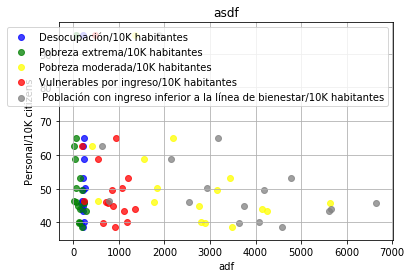

In [72]:
# loop to plot the x and y scatter for each of the following rubros
i=0
demos2=["Desocupación/10K habitantes", "Pobreza extrema/10K habitantes","Pobreza moderada/10K habitantes",
      "Vulnerables por ingreso/10K habitantes"," Población con ingreso inferior a la línea de bienestar/10K habitantes"]
colores=["blue", "green", "yellow","red","gray"]

for demos in demos2:
       
    plt.scatter(Daño_Vs_Demo_10K[demos], Daño_Vs_Demo_10K["Personal/10K habitantes"], marker="o", facecolors=colores[i], alpha=0.75)
    i=i+1

# Incorporate the other graph properties

plt.grid()
plt.title("asdf")
plt.xlabel("adf")
plt.ylabel("Personal/10K citizens")

# Create a legend
#plt.legend(handles=[ Urban, Suburban, Rural], loc= "upper rigth")
plt.legend(demos2, loc="best")


# Save Figure
plt.savefig("Unemployment and Religion Vs Crime.png")

# Prints the scatter plot to the screen
plt.show()

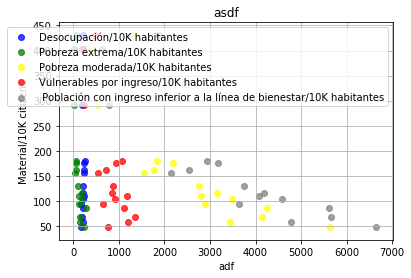

In [73]:
# loop to plot the x and y scatter for each of the following rubros
i=0
demos2=["Desocupación/10K habitantes", "Pobreza extrema/10K habitantes","Pobreza moderada/10K habitantes",
      "Vulnerables por ingreso/10K habitantes"," Población con ingreso inferior a la línea de bienestar/10K habitantes"]
colores=["blue", "green", "yellow","red","gray"]

for demos in demos2:
       
    plt.scatter(Daño_Vs_Demo_10K[demos], Daño_Vs_Demo_10K["Material/10K habitantes"], marker="o", facecolors=colores[i], alpha=0.75)
    i=i+1

# Incorporate the other graph properties

plt.grid()
plt.title("asdf")
plt.xlabel("adf")
plt.ylabel("Material/10K citizens")

# Create a legend
#plt.legend(handles=[ Urban, Suburban, Rural], loc= "upper rigth")
plt.legend(demos2, loc="best")


# Save Figure
plt.savefig("Unemployment and Religion Vs Crime.png")

# Prints the scatter plot to the screen
plt.show()